In [69]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import IPython
from pydub import AudioSegment# Load files
import wave# Open wav file and read frames as bytes
import os
import sys
import pandas as pd
import soundfile as sf

%matplotlib inline

In [15]:
TEST_FOLDER_1 = os.path.join('data', 'Test1')
TEST_FOLDER_2 = os.path.join('data', 'Test2')
TEST_FOLDER_3 = os.path.join('data', 'Test3')
TEST_FOLDER_4 = os.path.join('data', 'Test4')

ULTRASHALL_FOLDER = os.path.join('data', 'Ultraschall_ampels')
STEREO_FOLDER = os.path.join('data', 'Wav Daniel')
STEREO_CSV_1 = os.path.join('data', 'Wav Daniel', 'Messdaten_Stereo_Daniel_1.csv')
STEREO_CSV_2 = os.path.join('data', 'Wav Daniel', 'Messdaten_Stereo_Test2.csv')

In [14]:
files_test1 = [os.path.join(TEST_FOLDER_1, file) for file in os.listdir(TEST_FOLDER_1)]
files_test2 = [os.path.join(TEST_FOLDER_2, file) for file in os.listdir(TEST_FOLDER_2)]
files_test3 = [os.path.join(TEST_FOLDER_3, file) for file in os.listdir(TEST_FOLDER_3)]
files_test4 = [os.path.join(TEST_FOLDER_4, file) for file in os.listdir(TEST_FOLDER_4)]

ultraschall = [os.path.join(ULTRASHALL_FOLDER, file) for file in os.listdir(ULTRASHALL_FOLDER)]
stereo = [os.path.join(STEREO_FOLDER, file) for file in os.listdir(STEREO_FOLDER)]

ultraschall


['data\\Ultraschall_ampels\\last_tryt.wav',
 'data\\Ultraschall_ampels\\TestIO_1.wav',
 'data\\Ultraschall_ampels\\Test_Hammer_1.wav',
 'data\\Ultraschall_ampels\\Test_Hammer_2.wav']

In [61]:
df = pd.read_csv(STEREO_CSV_1, delimiter=';')
df['Zeit'] = df['Zeit'].astype('datetime64[ns]')

mic1 = pd.DataFrame(zip(df['Mic1_L (Sel)'],df['Zeit']))
mic2 = pd.DataFrame(zip(df['Mic2_R'],df['Zeit']))

mic1_array = df['Mic1_L (Sel)'].to_numpy(dtype='int16')
mic2_array = df['Mic2_R'].to_numpy(dtype='int16')

C:\Users\demac\AppData\Local\Temp\ipykernel_332\1540893952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Zeit'] = df['Zeit'].astype('datetime64[ns]')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


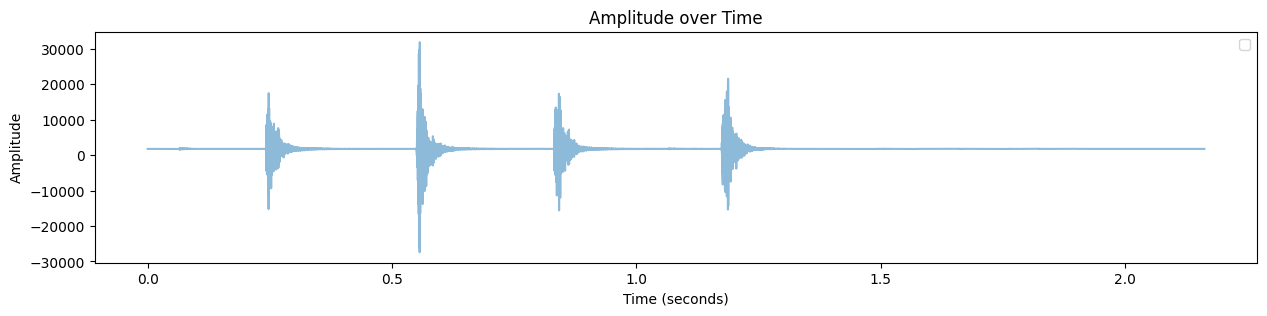

In [59]:
soundwave_sf = np.frombuffer(mic1_array, dtype='int16')
framerate_sf = 44800
time_sf = np.linspace(start=0,
                    stop=len(soundwave_sf)/framerate_sf,
                    num=len(soundwave_sf))# Set up plot
f, ax = plt.subplots(figsize=(15, 3))# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')# Add the audio data to the plot
ax = plt.plot(time_sf, soundwave_sf, alpha=0.5)
plt.legend()
plt.show()

In [77]:
sf.write('mic2_array.wav', mic2_array, 9500, 'PCM_16')
sf.write('mic1_array.wav', mic1_array, 9500, 'PCM_16')